## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9741921	total: 58.4ms	remaining: 58.3s
1:	learn: 0.9554355	total: 59.6ms	remaining: 29.7s
2:	learn: 0.9363590	total: 60.7ms	remaining: 20.2s
3:	learn: 0.9205124	total: 61.8ms	remaining: 15.4s
4:	learn: 0.9056136	total: 62.9ms	remaining: 12.5s
5:	learn: 0.8901655	total: 64ms	remaining: 10.6s
6:	learn: 0.8743311	total: 65ms	remaining: 9.23s
7:	learn: 0.8587479	total: 65.9ms	remaining: 8.18s
8:	learn: 0.8436995	total: 66.9ms	remaining: 7.37s
9:	learn: 0.8269150	total: 67.8ms	remaining: 6.71s
10:	learn: 0.8115099	total: 68.8ms	remaining: 6.19s
11:	learn: 0.7976493	total: 69.8ms	remaining: 5.75s
12:	learn: 0.7832164	total: 70.8ms	remaining: 5.37s
13:	learn: 0.7687639	total: 71.7ms	remaining: 5.05s
14:	learn: 0.7573833	total: 72.7ms	remaining: 4.77s
15:	learn: 0.7449150	total: 73.5ms	remaining: 4.52s
16:	learn: 0.7318205	total: 74.3ms	remaining: 4.29s
17:	learn: 0.7201282	total: 75.2ms	remaining: 4.1s
18:	learn: 0.7080342	total: 76.1ms	remaining: 3.9

51:	learn: 0.4635262	total: 107ms	remaining: 1.95s
52:	learn: 0.4586525	total: 108ms	remaining: 1.93s
53:	learn: 0.4553886	total: 109ms	remaining: 1.91s
54:	learn: 0.4503699	total: 110ms	remaining: 1.89s
55:	learn: 0.4463935	total: 111ms	remaining: 1.87s
56:	learn: 0.4431039	total: 112ms	remaining: 1.85s
57:	learn: 0.4385443	total: 113ms	remaining: 1.83s
58:	learn: 0.4354021	total: 114ms	remaining: 1.81s
59:	learn: 0.4308483	total: 115ms	remaining: 1.8s
60:	learn: 0.4269928	total: 115ms	remaining: 1.78s
61:	learn: 0.4230296	total: 116ms	remaining: 1.76s
62:	learn: 0.4195787	total: 117ms	remaining: 1.74s
63:	learn: 0.4157440	total: 118ms	remaining: 1.73s
64:	learn: 0.4122576	total: 119ms	remaining: 1.72s
65:	learn: 0.4096398	total: 120ms	remaining: 1.7s
66:	learn: 0.4068277	total: 121ms	remaining: 1.69s
67:	learn: 0.4031719	total: 122ms	remaining: 1.67s
68:	learn: 0.4005983	total: 123ms	remaining: 1.66s
69:	learn: 0.3979806	total: 124ms	remaining: 1.64s
70:	learn: 0.3948808	total: 125ms

145:	learn: 0.2743735	total: 192ms	remaining: 1.12s
146:	learn: 0.2732708	total: 193ms	remaining: 1.12s
147:	learn: 0.2721644	total: 194ms	remaining: 1.12s
148:	learn: 0.2707857	total: 195ms	remaining: 1.11s
149:	learn: 0.2697723	total: 196ms	remaining: 1.11s
150:	learn: 0.2687405	total: 197ms	remaining: 1.1s
151:	learn: 0.2675834	total: 197ms	remaining: 1.1s
152:	learn: 0.2662293	total: 198ms	remaining: 1.1s
153:	learn: 0.2655083	total: 199ms	remaining: 1.09s
154:	learn: 0.2645865	total: 200ms	remaining: 1.09s
155:	learn: 0.2640463	total: 201ms	remaining: 1.09s
156:	learn: 0.2632664	total: 202ms	remaining: 1.08s
157:	learn: 0.2625708	total: 203ms	remaining: 1.08s
158:	learn: 0.2617729	total: 204ms	remaining: 1.08s
159:	learn: 0.2611328	total: 204ms	remaining: 1.07s
160:	learn: 0.2601306	total: 205ms	remaining: 1.07s
161:	learn: 0.2596649	total: 206ms	remaining: 1.07s
162:	learn: 0.2590312	total: 207ms	remaining: 1.06s
163:	learn: 0.2580369	total: 208ms	remaining: 1.06s
164:	learn: 0.2

262:	learn: 0.2003221	total: 298ms	remaining: 836ms
263:	learn: 0.1997772	total: 299ms	remaining: 835ms
264:	learn: 0.1991183	total: 300ms	remaining: 833ms
265:	learn: 0.1987000	total: 301ms	remaining: 832ms
266:	learn: 0.1981749	total: 302ms	remaining: 830ms
267:	learn: 0.1978367	total: 303ms	remaining: 828ms
268:	learn: 0.1972285	total: 304ms	remaining: 827ms
269:	learn: 0.1968444	total: 305ms	remaining: 825ms
270:	learn: 0.1962272	total: 306ms	remaining: 824ms
271:	learn: 0.1956555	total: 307ms	remaining: 822ms
272:	learn: 0.1949166	total: 308ms	remaining: 820ms
273:	learn: 0.1945167	total: 309ms	remaining: 818ms
274:	learn: 0.1938278	total: 310ms	remaining: 817ms
275:	learn: 0.1932435	total: 311ms	remaining: 815ms
276:	learn: 0.1928136	total: 311ms	remaining: 813ms
277:	learn: 0.1922907	total: 312ms	remaining: 811ms
278:	learn: 0.1916671	total: 313ms	remaining: 809ms
279:	learn: 0.1912029	total: 314ms	remaining: 808ms
280:	learn: 0.1907430	total: 316ms	remaining: 808ms
281:	learn: 

357:	learn: 0.1613695	total: 383ms	remaining: 687ms
358:	learn: 0.1609747	total: 384ms	remaining: 686ms
359:	learn: 0.1608249	total: 385ms	remaining: 684ms
360:	learn: 0.1604009	total: 386ms	remaining: 683ms
361:	learn: 0.1601340	total: 387ms	remaining: 682ms
362:	learn: 0.1597958	total: 388ms	remaining: 680ms
363:	learn: 0.1595240	total: 389ms	remaining: 679ms
364:	learn: 0.1593415	total: 389ms	remaining: 678ms
365:	learn: 0.1588470	total: 390ms	remaining: 676ms
366:	learn: 0.1585657	total: 391ms	remaining: 675ms
367:	learn: 0.1581166	total: 392ms	remaining: 674ms
368:	learn: 0.1579310	total: 393ms	remaining: 672ms
369:	learn: 0.1575936	total: 394ms	remaining: 671ms
370:	learn: 0.1573502	total: 395ms	remaining: 670ms
371:	learn: 0.1571532	total: 396ms	remaining: 668ms
372:	learn: 0.1568208	total: 397ms	remaining: 667ms
373:	learn: 0.1565240	total: 398ms	remaining: 666ms
374:	learn: 0.1562316	total: 399ms	remaining: 664ms
375:	learn: 0.1560827	total: 399ms	remaining: 663ms
376:	learn: 

476:	learn: 0.1324335	total: 490ms	remaining: 537ms
477:	learn: 0.1321210	total: 491ms	remaining: 536ms
478:	learn: 0.1318713	total: 492ms	remaining: 535ms
479:	learn: 0.1317750	total: 493ms	remaining: 534ms
480:	learn: 0.1315641	total: 494ms	remaining: 533ms
481:	learn: 0.1312383	total: 494ms	remaining: 531ms
482:	learn: 0.1310446	total: 495ms	remaining: 530ms
483:	learn: 0.1307967	total: 496ms	remaining: 529ms
484:	learn: 0.1304078	total: 497ms	remaining: 528ms
485:	learn: 0.1302234	total: 498ms	remaining: 527ms
486:	learn: 0.1301257	total: 499ms	remaining: 526ms
487:	learn: 0.1299469	total: 500ms	remaining: 524ms
488:	learn: 0.1296391	total: 501ms	remaining: 523ms
489:	learn: 0.1293139	total: 502ms	remaining: 522ms
490:	learn: 0.1290749	total: 502ms	remaining: 521ms
491:	learn: 0.1289545	total: 503ms	remaining: 520ms
492:	learn: 0.1287269	total: 504ms	remaining: 519ms
493:	learn: 0.1286190	total: 505ms	remaining: 517ms
494:	learn: 0.1284318	total: 506ms	remaining: 516ms
495:	learn: 

571:	learn: 0.1133504	total: 575ms	remaining: 430ms
572:	learn: 0.1131680	total: 576ms	remaining: 429ms
573:	learn: 0.1129696	total: 577ms	remaining: 428ms
574:	learn: 0.1126891	total: 578ms	remaining: 427ms
575:	learn: 0.1124151	total: 579ms	remaining: 426ms
576:	learn: 0.1122985	total: 580ms	remaining: 425ms
577:	learn: 0.1121456	total: 580ms	remaining: 424ms
578:	learn: 0.1118563	total: 581ms	remaining: 423ms
579:	learn: 0.1116857	total: 582ms	remaining: 422ms
580:	learn: 0.1115490	total: 583ms	remaining: 420ms
581:	learn: 0.1113737	total: 584ms	remaining: 419ms
582:	learn: 0.1112220	total: 585ms	remaining: 418ms
583:	learn: 0.1111218	total: 586ms	remaining: 417ms
584:	learn: 0.1110984	total: 587ms	remaining: 416ms
585:	learn: 0.1110591	total: 587ms	remaining: 415ms
586:	learn: 0.1110394	total: 588ms	remaining: 414ms
587:	learn: 0.1107811	total: 589ms	remaining: 413ms
588:	learn: 0.1106055	total: 590ms	remaining: 412ms
589:	learn: 0.1103134	total: 591ms	remaining: 411ms
590:	learn: 

690:	learn: 0.0947049	total: 681ms	remaining: 305ms
691:	learn: 0.0945028	total: 683ms	remaining: 304ms
692:	learn: 0.0943368	total: 683ms	remaining: 303ms
693:	learn: 0.0942523	total: 684ms	remaining: 302ms
694:	learn: 0.0940511	total: 685ms	remaining: 301ms
695:	learn: 0.0940112	total: 686ms	remaining: 300ms
696:	learn: 0.0939746	total: 687ms	remaining: 299ms
697:	learn: 0.0938787	total: 688ms	remaining: 298ms
698:	learn: 0.0937521	total: 689ms	remaining: 297ms
699:	learn: 0.0936091	total: 690ms	remaining: 296ms
700:	learn: 0.0934688	total: 691ms	remaining: 295ms
701:	learn: 0.0932811	total: 691ms	remaining: 294ms
702:	learn: 0.0931730	total: 692ms	remaining: 292ms
703:	learn: 0.0930260	total: 693ms	remaining: 291ms
704:	learn: 0.0928979	total: 694ms	remaining: 290ms
705:	learn: 0.0928268	total: 695ms	remaining: 289ms
706:	learn: 0.0927282	total: 696ms	remaining: 288ms
707:	learn: 0.0926244	total: 697ms	remaining: 287ms
708:	learn: 0.0924598	total: 697ms	remaining: 286ms
709:	learn: 

784:	learn: 0.0824722	total: 767ms	remaining: 210ms
785:	learn: 0.0823442	total: 768ms	remaining: 209ms
786:	learn: 0.0821979	total: 768ms	remaining: 208ms
787:	learn: 0.0820038	total: 769ms	remaining: 207ms
788:	learn: 0.0818915	total: 770ms	remaining: 206ms
789:	learn: 0.0817876	total: 771ms	remaining: 205ms
790:	learn: 0.0815931	total: 772ms	remaining: 204ms
791:	learn: 0.0815400	total: 773ms	remaining: 203ms
792:	learn: 0.0813875	total: 774ms	remaining: 202ms
793:	learn: 0.0812309	total: 775ms	remaining: 201ms
794:	learn: 0.0810831	total: 776ms	remaining: 200ms
795:	learn: 0.0809262	total: 776ms	remaining: 199ms
796:	learn: 0.0807028	total: 777ms	remaining: 198ms
797:	learn: 0.0805965	total: 778ms	remaining: 197ms
798:	learn: 0.0805015	total: 779ms	remaining: 196ms
799:	learn: 0.0803151	total: 780ms	remaining: 195ms
800:	learn: 0.0802597	total: 781ms	remaining: 194ms
801:	learn: 0.0801718	total: 782ms	remaining: 193ms
802:	learn: 0.0800818	total: 783ms	remaining: 192ms
803:	learn: 

904:	learn: 0.0696015	total: 874ms	remaining: 91.7ms
905:	learn: 0.0694483	total: 875ms	remaining: 90.7ms
906:	learn: 0.0693290	total: 875ms	remaining: 89.8ms
907:	learn: 0.0692676	total: 876ms	remaining: 88.8ms
908:	learn: 0.0691749	total: 877ms	remaining: 87.8ms
909:	learn: 0.0690244	total: 878ms	remaining: 86.8ms
910:	learn: 0.0689364	total: 879ms	remaining: 85.9ms
911:	learn: 0.0688067	total: 880ms	remaining: 84.9ms
912:	learn: 0.0686488	total: 881ms	remaining: 83.9ms
913:	learn: 0.0685799	total: 882ms	remaining: 83ms
914:	learn: 0.0685250	total: 883ms	remaining: 82ms
915:	learn: 0.0684390	total: 884ms	remaining: 81.1ms
916:	learn: 0.0683091	total: 885ms	remaining: 80.1ms
917:	learn: 0.0682448	total: 886ms	remaining: 79.1ms
918:	learn: 0.0681758	total: 886ms	remaining: 78.1ms
919:	learn: 0.0680750	total: 887ms	remaining: 77.2ms
920:	learn: 0.0680085	total: 888ms	remaining: 76.2ms
921:	learn: 0.0678756	total: 889ms	remaining: 75.2ms
922:	learn: 0.0677781	total: 890ms	remaining: 74.2

997:	learn: 0.0617908	total: 958ms	remaining: 1.92ms
998:	learn: 0.0617086	total: 959ms	remaining: 959us
999:	learn: 0.0616977	total: 960ms	remaining: 0us


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

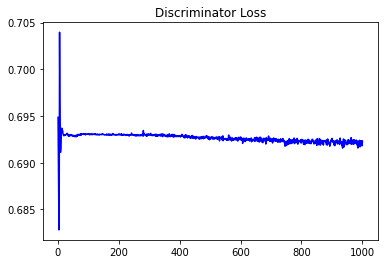

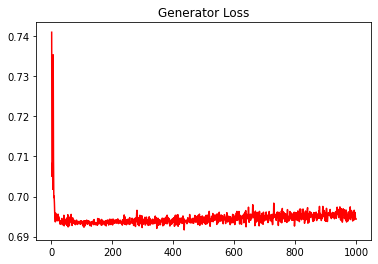

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.07985736710969384


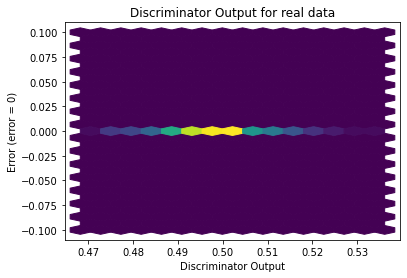

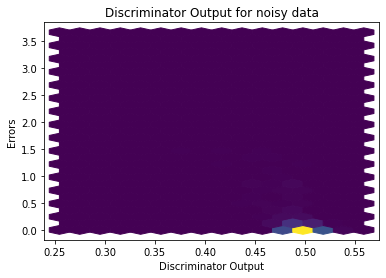

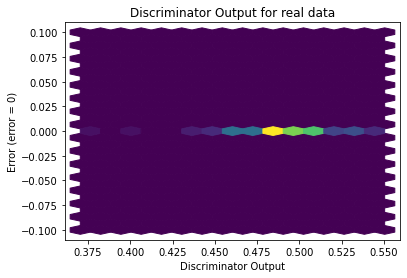

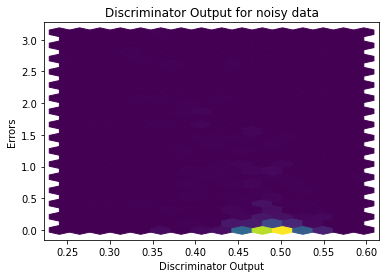

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


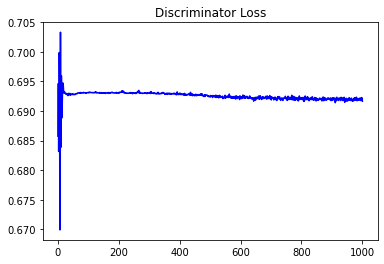

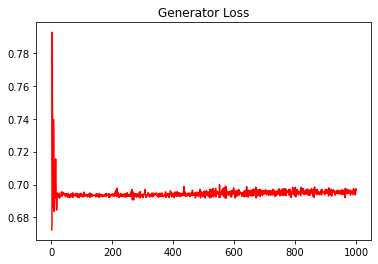

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.0754462061283809


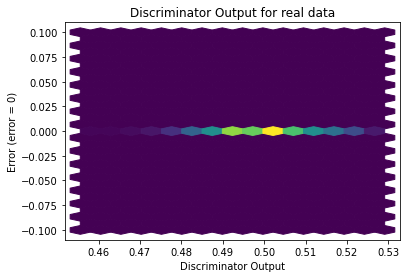

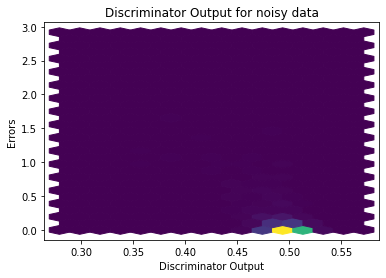

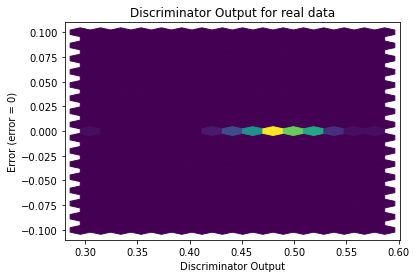

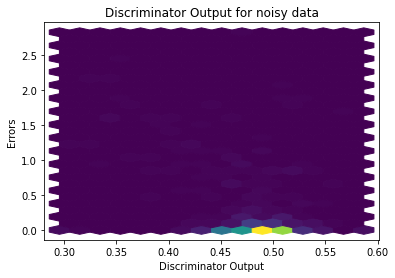

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.7064]], requires_grad=True)
